In [342]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [343]:
df=pd.read_csv('netflix_titles.csv')

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [345]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [346]:
df.describe(include='O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [347]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [348]:
df[['director','cast','country']] = df[['director','cast','country']].fillna("Unknown")

In [349]:
df = df.dropna(subset=['rating','duration'])


In [350]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])


In [351]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [352]:
df.duplicated().sum()

np.int64(0)

In [353]:
df['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

/tmp/ipython-input-3469364587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


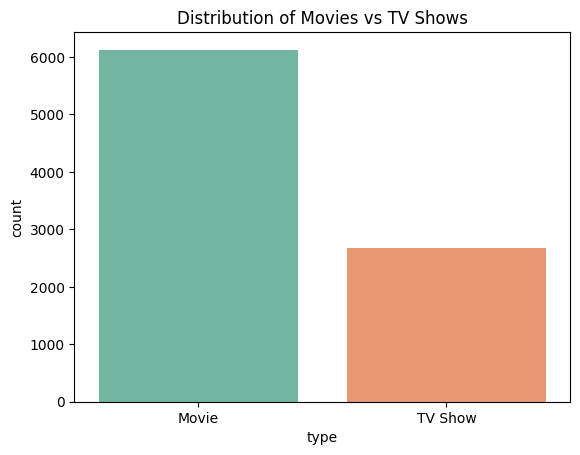

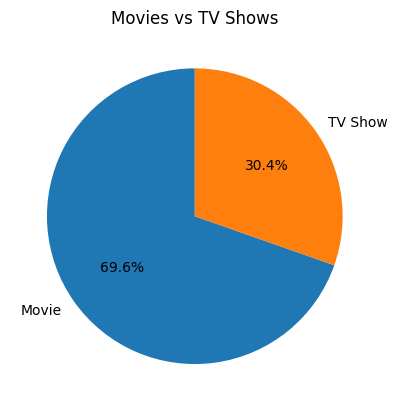

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.show()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Movies vs TV Shows")
plt.show()


In [355]:
df['rating']

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA
...,...
8802,R
8803,TV-Y7
8804,R
8805,PG


In [356]:
def simplify_rating(rating):
    family = ['G', 'PG', 'TV-Y', 'TV-Y7', 'TV-PG', 'TV-G']
    teens = ['PG-13', 'TV-14', 'TV-Y7-FV']
    adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

    if rating in family:
        return 'Family'
    elif rating in teens:
        return 'Teens'
    elif rating in adults:
        return 'Adults'
    else:
        return 'Unknown'

df['rating'] = df['rating'].apply(simplify_rating)

print(df['rating'].value_counts())

rating
Adults    4092
Teens     2656
Family    2052
Name: count, dtype: int64


/tmp/ipython-input-158513095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


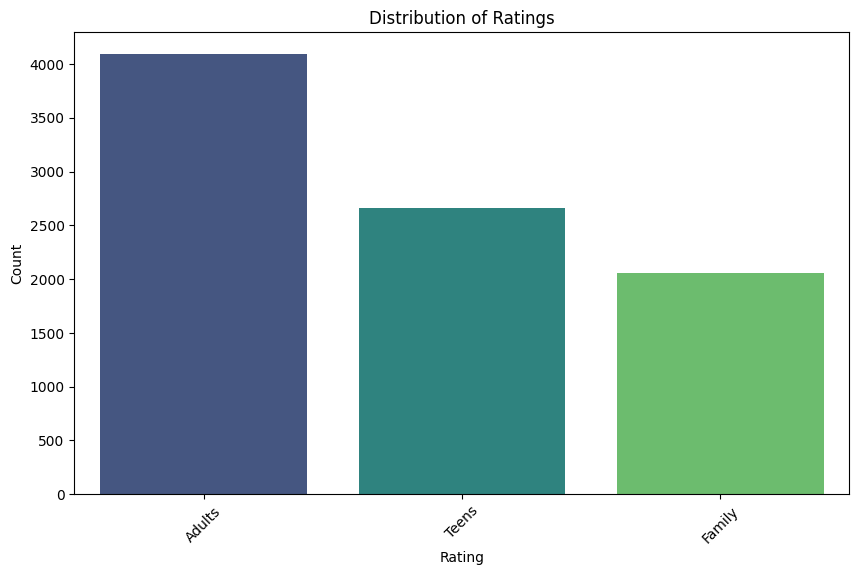

In [357]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-14531619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


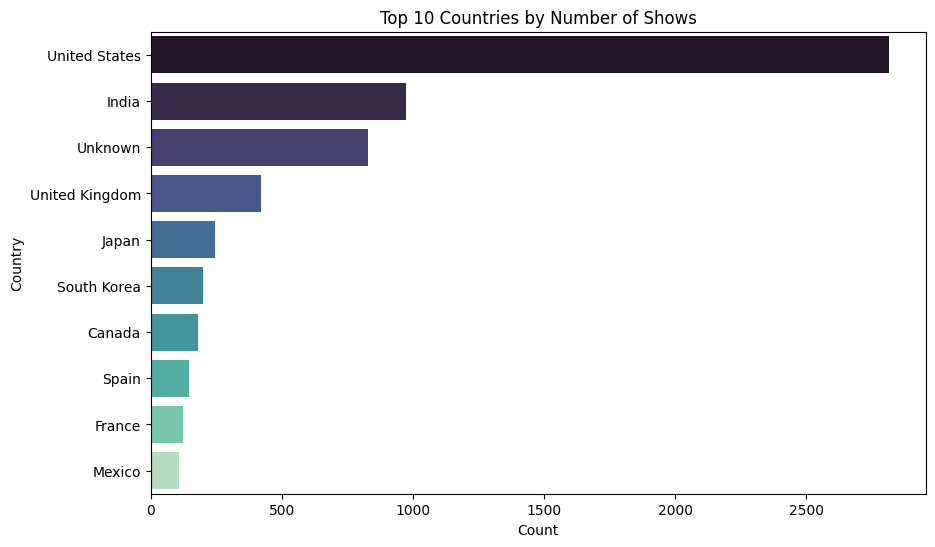

In [358]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-613185310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


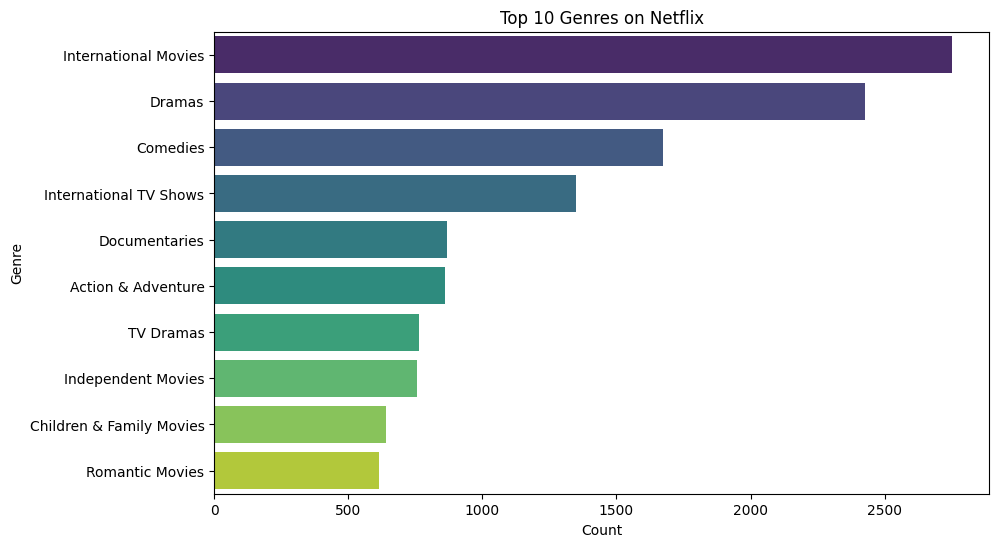

In [359]:
all_genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [360]:



# df['duration_num'] = df['duration'].apply(convert_duration)


# # Pipeline = Preprocessing + Model
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(max_iter=200))
# ])

# # Train/Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # تدريب
# model.fit(X_train, y_train)

# # تنبؤ
# y_pred = model.predict(X_test)

# # تقييم
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [361]:
df['duration']

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
...,...
8802,158 min
8803,2 Seasons
8804,88 min
8805,88 min


In [362]:
def convert_duration(x):
    if "min" in x:
        return int(x.replace("min", "").strip())
    elif "Season" in x:
        return int(x.split()[0]) * 60
    else:
        return 0

In [363]:
df['duration'] = df['duration'].apply(convert_duration)
df['duration']

,duration
0,90
1,120
2,60
3,60
4,120
...,...
8802,158
8803,120
8804,88
8805,88


In [364]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categorical = ['rating', 'listed_in']
numeric = ['release_year', 'duration']

ohe = OneHotEncoder(drop='first', sparse_output=False)

transformer = make_column_transformer(
    (ohe, categorical),
    ('passthrough', numeric),
    verbose_feature_names_out=False
)

X = df[categorical + numeric]

transformed = transformer.fit_transform(X)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())


In [365]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [366]:
# Classification on type
y = df['type']

X = transformed_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [367]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
print(df_results)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.993750       0.981818
1        Decision Tree        1.000000       0.995455
2        Random Forest        1.000000       0.996023
3    Gradient Boosting        0.993324       0.990909
4                  KNN        0.987784       0.982955


In [368]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df.rating)

df_mi = df.apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
title,1.057114
show_id,1.057114
rating,1.057114
description,1.056582
cast,0.949738
director,0.621412
listed_in,0.366692
date_added,0.283172
country,0.156584
duration,0.083704


In [369]:
y = df['rating']

categorical = ['listed_in']
numeric = ['release_year', 'duration']

ohe = OneHotEncoder(drop='first', sparse_output=False)

transformer = make_column_transformer(
    (ohe, categorical),
    ('passthrough', numeric),
    verbose_feature_names_out=False
)

X = df[categorical + numeric]

transformed = transformer.fit_transform(X)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())


X = transformed_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,"listed_in_Action & Adventure, Anime Features","listed_in_Action & Adventure, Anime Features, Children & Family Movies","listed_in_Action & Adventure, Anime Features, Classic Movies","listed_in_Action & Adventure, Anime Features, Horror Movies","listed_in_Action & Adventure, Anime Features, International Movies","listed_in_Action & Adventure, Anime Features, Sci-Fi & Fantasy","listed_in_Action & Adventure, Children & Family Movies","listed_in_Action & Adventure, Children & Family Movies, Classic Movies","listed_in_Action & Adventure, Children & Family Movies, Comedies","listed_in_Action & Adventure, Children & Family Movies, Cult Movies",...,"listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers,release_year,duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,90.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,120.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,60.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,60.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,120.0


In [370]:
y.head()

,rating
0,Teens
1,Adults
2,Adults
3,Adults
4,Adults


In [371]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
print(df_results)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.645739       0.619318
1    Gradient Boosting        0.657244       0.616477
2                  KNN        0.678267       0.535227
